In [1]:
import numpy as np
from scipy.stats import ortho_group
from matplotlib import pyplot as plt

class func:
    def __init__(self, n, seed=177, max_iters=50,step_size=0.03):
        """
        intitialize random coefficients with given dimention
        """
        np.random.seed(seed)
        self.n = n
        self.b = np.matrix(2 * np.random.rand(n, 1) - 1)
        self.U = np.matrix(ortho_group.rvs(dim=n))
        self.D = np.matrix(np.diagflat(np.random.rand(n)))
        self.A = self.U.T * self.D * self.U
        self.k = step_size/(min(np.linalg.eigvals(self.A)))
        self.step_size=step_size
        self.max_iters = max_iters


    def f(self, x):
        """
        calculate f(x) with input x
        """
        return np.asscalar(1 / 2 * x.T * self.A * x + self.b.T * x)

    def df(self, x):

        """
        calculate f'(x) with input x
        """
        return self.A * x + self.b

    def grad_desc(self):
        
        x = np.matrix(np.zeros((self.n, 1)))
        self.fun_values_gd = [self.f(x)]
        for i in range(self.max_iters-1):
            # calculate derivative
            d = self.df(x)
            # update x
            x -= self.step_size * d
            # get new function value
            self.fun_values_gd.append(self.f(x))

    def acc_grad_desc(self):
        
        x = np.matrix(np.zeros((self.n, 1)))
        y = x
        self.fun_values_agd = [self.f(x)]
        for i in range(self.max_iters-1):
            # calculate derivative
            d = self.df(x)
            # update x and y
            y_next = x - self.step_size * d
            x = (1+(np.sqrt(self.k)-1)/(np.sqrt(self.k)+1))*y_next - (np.sqrt(self.k)-1)/(np.sqrt(self.k)+1)*y
            y=y_next
            # get new function value
            self.fun_values_agd.append(self.f(x))


<ipython-input-1-cfe3c881712c>:25: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return np.asscalar(1 / 2 * x.T * self.A * x + self.b.T * x)


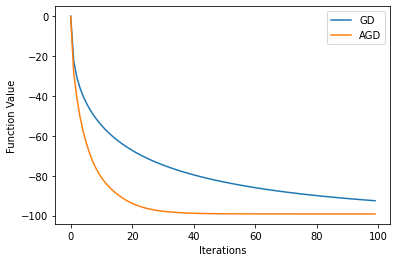

In [3]:
n=100
seed=1993
max_iters=100
step_size=0.995
# create my random function
my_fun = func(n=n,seed=seed,max_iters=max_iters,step_size=step_size)
# run graident descent
my_fun.grad_desc()
my_fun.acc_grad_desc()
# plot
plt.plot(range(max_iters), my_fun.fun_values_gd, label='GD')
plt.plot(range(max_iters), my_fun.fun_values_agd, label='AGD')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.show()
# plt.savefig('fig3.png',dpi=1000)


In [4]:
print(max(np.linalg.eigvals(my_fun.A)),min(np.linalg.eigvals(my_fun.A)),my_fun.k)

0.9912700981404075 0.0077991652871275755 127.57775523006738


<ipython-input-1-cfe3c881712c>:25: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  return np.asscalar(1 / 2 * x.T * self.A * x + self.b.T * x)


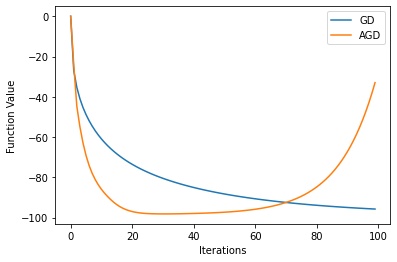

In [6]:
n=100
seed=1993
max_iters=100
step_size=1.4
# create my random function
my_fun = func(n=n,seed=seed,max_iters=max_iters,step_size=step_size)
# run graident descent
my_fun.grad_desc()
my_fun.acc_grad_desc()
# plot
plt.plot(range(max_iters), my_fun.fun_values_gd, label='GD')
plt.plot(range(max_iters), my_fun.fun_values_agd, label='AGD')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.show()
# plt.savefig('fig4.png',dpi=1000)